 # KEPLER ASIMETRICO

In [4]:
from pylab import*
from scipy.integrate import*

%matplotlib inline

In [3]:
def RK4(ec, p_ini, x, args=0, h=0.01):
    if (x[1] - x[0]) <= 5.*h:
        h= (x[1] - x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i])
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    else:
        for i in xrange(len(tiempos)-1):
            k_1=ec(sol[i,:],tiempos[i],args)
            k_2=ec(sol[i,:]+0.5*h*k_1,tiempos[i]+0.5*h,args)
            k_3=ec(sol[i,:]+0.5*h*k_2,tiempos[i]+0.5*h,args)
            k_4=ec(sol[i,:]+h*k_3,tiempos[i]+h,args)
            sol[i+1,:]= sol[i,:]+ (h/6.)*(k_1+2*k_2+2*k_3+k_4)
    return tiempos,sol


In [10]:
def ec_mov(x_p,t,a=0):
    #x_p representa x ,y ,px , py
    r3_2 = (x_p[0]**2 + x_p[1]**2)** (1.5)#calcula r a la 3/2
    desv = 1.+a
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r3_2
    dpy = -(x_p[1]*desv)/r3_2
    return array([dx,dy,dpx,dpy])

In [11]:
def Energia(x_p,a):
    x,y,px,py = x_p[:,0],x_p[:,1], x_p[:,2], x_p[:,3]
    E = 0.5*(px*px*(1.+a) + py*py) - ((1.+a)/sqrt(x**2+y**2))
    return E

In [18]:
def  L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1], x_p[:,2], x_p[:,3]
    L= x*py - y*px
    return L

In [19]:
alfa=0.03

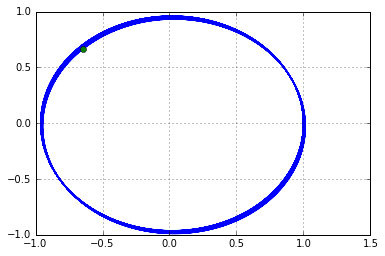

In [22]:
t=linspace(0,2*pi*50,5000)
sol = odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15) # rtol es el maximo error que le permitir el integrador de error entre punto y punto con esto el integrador hace mas pequeña el paso de integracion hasta encontrar la tolerancia que le admitimos
plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],"o")
grid(True)
show()

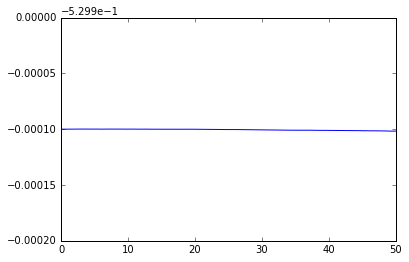

In [23]:
E = Energia(sol,alfa)
ylim(E[0]-0.0001 , E[0]+.0001)
plot(t/(2*pi),E)
show()

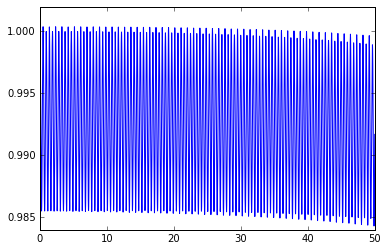

In [24]:
L=L_z(sol)
plot(t/(2*pi),L)
show()

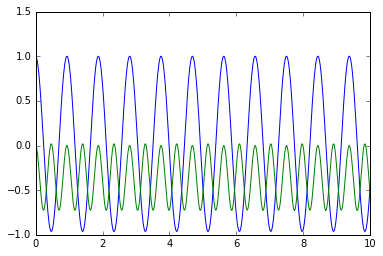

In [32]:
xlim([0,10])
plot(t/(2*pi),sol[:,0])
plot(t/(2*pi),50*(L-1))
show()

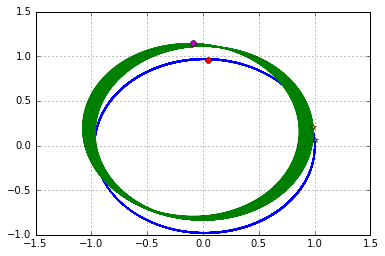

In [51]:
t=linspace(0,2*pi*50,5000)
alfa=0.02
sol = odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15) # rtol es el maximo error que le permitir el integrador de error entre punto y punto con esto el integrador hace mas pequeña el paso de integracion hasta encontrar la tolerancia que le admitimos
sol2 = odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alfa,),rtol=1e-15) # rtol es el maximo error que le permitir el integrador de error entre punto y punto con esto el integrador hace mas pequeña el paso de integracion hasta encontrar la tolerancia que le admitimos
plot(sol[:,0],sol[:,1])
plot(sol2[:,0],sol2[:,1])
plot(sol[-1,0],sol[-1,1],"o"),plot(sol[0,0],sol[1,1],"*")
plot(sol2[-1,0],sol2[-1,1],"o"),plot(sol2[0,0],sol2[1,1],"*")

grid(True)
show()

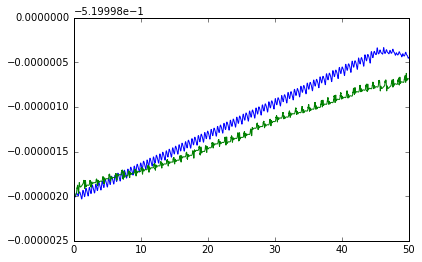

In [56]:
E = Energia(sol,alfa)
E2 = Energia(sol2,alfa)
#ylim(E[0]-0.01 , E[0]+.01)

plot(t/(2*pi),E)
plot(t/(2*pi),E2)
show()

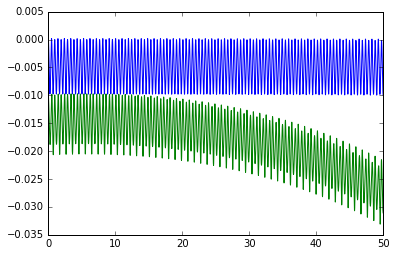

In [58]:
L=L_z(sol)
L2=L_z(sol2)
plot(t/(2*pi),L-1)
plot(t/(2*pi),L2-1)
#xlim([0,10])
show()

Si modificamos logeramente las condiciones iniciales las trayecctorias empiezan a diferir ligeramente, en el caso de la energia, entre menor sea el valor de alpha las energias se van pareciendo mucho más, mientras que el momento angular en los primeros valores se asemejan pero despues disminuye conforme 

Si analizamos el espectro del momento angular, para poder depresiar las perturvaciones y ver si hay mas de una frecuencia 

Cuando hay pertuvación , cituada en el punto 0,0 ,que sería el otro planeta, estrella etc, la trayectoria del cuerpo moviendose empezara a describier una elipce con un tipo de desplazamiento


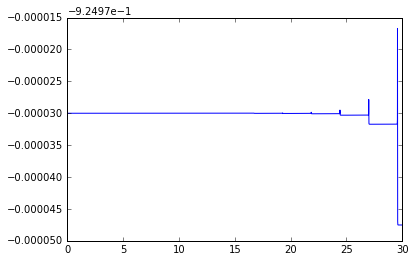

In [23]:
E = Energia(sol,0.05)
plot(t,E)
show()


Si disminuye la energía entonces hay un problema de fricción numerica, por lo que perdemos presición en la integración.
pierde precición cerca del origen

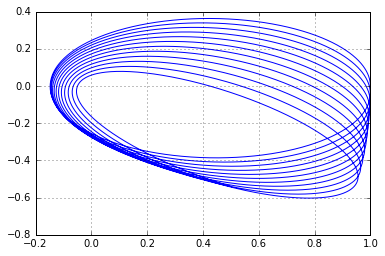

In [21]:
t,sol = RK4(ec_mov,[1,0,0,0.5],[0,30],0.05,0.001) # encontramos que el mejor paso para la integracion es de 0.001
plot(sol[:,0],sol[:,1])
grid(True)
show()

si la energia se va a infinito nos indica que ha colisionado el problema.
si corro con mayor presición y desaparece este aumento de energia quiere decir que fue un error de la simulación

Hay un cambio abrupto cuando pasan 90 años

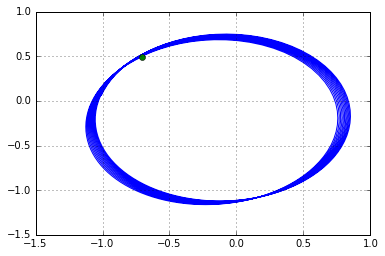

In [58]:
t=linspace(0,2*pi*10,1000)
sol = odeint(ec_mov,sol[-1,:],t,args=(0.05,)) # encontramos que el mejor paso para la integracion es de 0.001
plot(sol[:,0],sol[:,1])
plot(sol[-1,0],sol[-1,1],"o")
grid(True)
show()